In [2]:
import os
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from scipy.stats import chi2_contingency
import statsmodels.api as sm

In [3]:
os.chdir(r"C:\Users\Owner\Downloads\Datasets_sep")
df = pd.read_excel(r"C:\Users\Owner\Downloads\Datasets_sep\ML_project_dataset.xlsx", index_col=0).reset_index()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## <font color = 'green' > Dataset description: <br> </font>
###### <font color = 'orange' > **Age** : Age in years </font>
###### <font color = 'orange' > **Sex** : 1 = male; 0 = female </font>
###### <font color = 'orange' > **cp** : Chest pain type </font>
###### <font color = 'orange' > **trestbps** : Resting blood pressure (in mm Hg on admission to the hospital) </font>
###### <font color = 'orange' > **chol** : Serum cholesterol in mg/dl </font>
###### <font color = 'orange' > **fbs** : Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) </font>
###### <font color = 'orange' > **restecg** : Resting electrocardiographic results </font>
###### <font color = 'orange' > **thalach** : Maximum heart rate achieved </font>
###### <font color = 'orange' > **exang** : Exercise induced angina (1 = yes; 0 = no) </font>
###### <font color = 'orange' > **oldpeak** :	ST depression induced by exercise relative to rest </font>
###### <font color = 'orange' > **slope** :	Slope of the peak exercise ST segment </font>
###### <font color = 'orange' > **ca** :	Number of major vessels (0-3) colored by fluoroscopy </font>
###### <font color = 'orange' > **thal** :	3 = normal; 6 = fixed defect; 7 = reversible defect </font>
###### <font color = 'orange' > **Target** :	1 or 0 </font>



In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 1. Preliminary Analysis:
  ##### -   1a. Preliminary data inspection, structure of the data, and check for missing values and duplicates.
   ##### -   1b. Removal of duplicates and treating missing values.

In [5]:
df.shape

(303, 14)

###### <font color = 'yellow'> Within our dataset, there are 303 rows and 14 columns. </font>

In [6]:
df_dup = df.drop_duplicates(subset=['sex','cp','trestbps','chol','fbs','restecg','thalach',
                                      'exang','oldpeak','slope','ca','thal','target'])
df_dup.shape

(302, 14)

###### <font color = 'yellow'> After dropping duplicate values, we notice that there is a difference in row counts. Therefore, we had one duplicate row within our dataset. </font>

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

###### <font color = 'yellow'> This dataset does not have any columns with missing values.</font> <br>
###### <font color = 'yellow'> Although this dataset does not have any missing values, it is important to check invalid entries within individual columns.</font>
   - <font color = 'yellow'> we will begin with inspecting categorical columns.</font>

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df_num  = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
df_cat = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target', ]]

In [10]:
df.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

###### <font color = 'yellow'> Upon analyzing the 'ca' column, we notice that it has 4 ordinal values whereas the data dictionary states that there should be 3. </font>
  ###### <font color = 'yellow'> - To resolve this, we will drop 'ca' rows where values are 4. </font>

In [11]:
df = df[df['ca'] < 4]
df.ca.value_counts()

0    175
1     65
2     38
3     20
Name: ca, dtype: int64

In [12]:
df.thal.value_counts()

2    163
3    115
1     18
0      2
Name: thal, dtype: int64

###### <font color = 'yellow'> We also notice a difference in the 'thal' column, it has ordinal values ranging from 0-3 whereas the data dictionary lists 'thal' ordinal values as 3, 6, and 7. <br> We take note of this and work with the data available to us. </font>

In [13]:
# Resting Electrocardiographic results
df['restecg'].value_counts()

1    148
0    146
2      4
Name: restecg, dtype: int64

In [14]:
df['restecg_cat'] = df.apply(lambda x: 'zero' if x['restecg'] == 0 else 'non-zero', axis = 1)
df['restecg_cat'].value_counts()

non-zero    152
zero        146
Name: restecg_cat, dtype: int64

In [15]:
df['MCI_cat'] = df.apply(lambda x: 'MCI' if x['target'] == 1 else 'No MCI', axis =1)
df['MCI_cat'].value_counts()

MCI       161
No MCI    137
Name: MCI_cat, dtype: int64

###### <font color = 'yellow'> Here we are re-categorizing the target column as developing MCI and not developing MCI. <br> Myocardial Infarction (MCI) is another term for a heart attack. <br> Within our dataset, 161 individuals had a heart attack while 137 did not. </font>

## 2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below: <br>
##### a. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,54.510067,0.677852,0.959732,131.580537,246.906040,0.147651,0.523490,149.466443,0.328859,1.055369,1.395973,0.674497,2.312081,0.540268
std,9.030526,0.468085,1.033963,17.669293,51.893097,0.355350,0.526521,22.983830,0.470589,1.164162,0.617574,0.938202,0.614024,0.499214
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,165.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


###### <font color = 'yellow' > The statistical summary of our dataset reveals averages for : <br> a. Age = 54 years old. The maximum age is 77 years. 50% of individuals in our dataset are above the average age. <br> b. trestbps (Resting blood pressure) is 131.62 mm Hg. <br> c. thalach (Maximum heart rate achieved)  is 149.64. <br> d. oldpeak (ST depression) is 1.03

### b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot

In [17]:
df_num  = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
df_cat = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']]

###### <font color = 'yellow' > From the describe function, we were also able to infer that there are 5 numerical columns and 9 categorical categories.

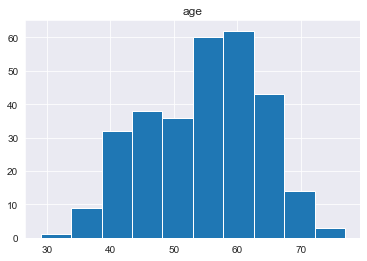

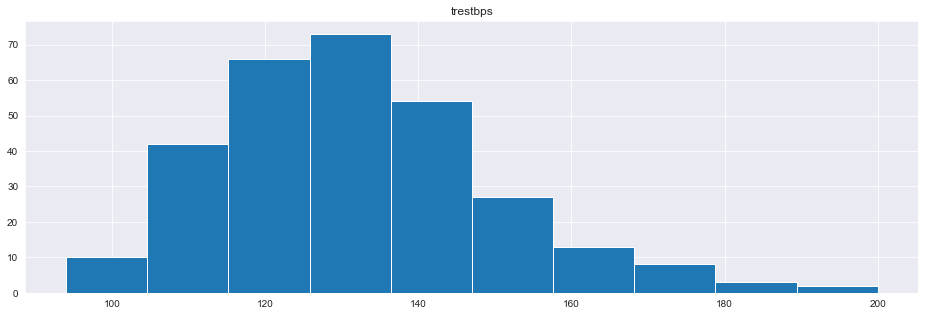

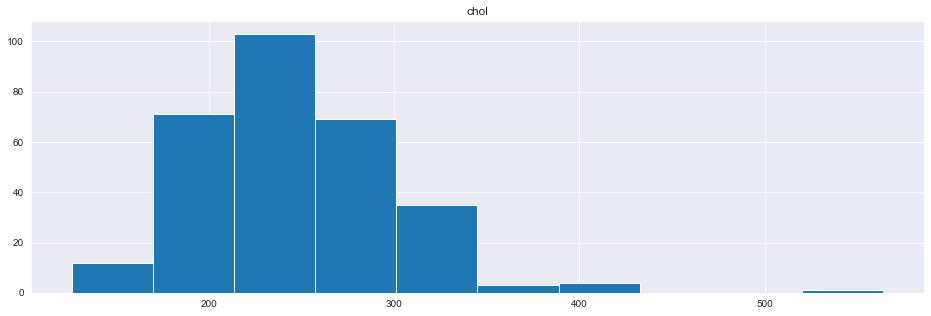

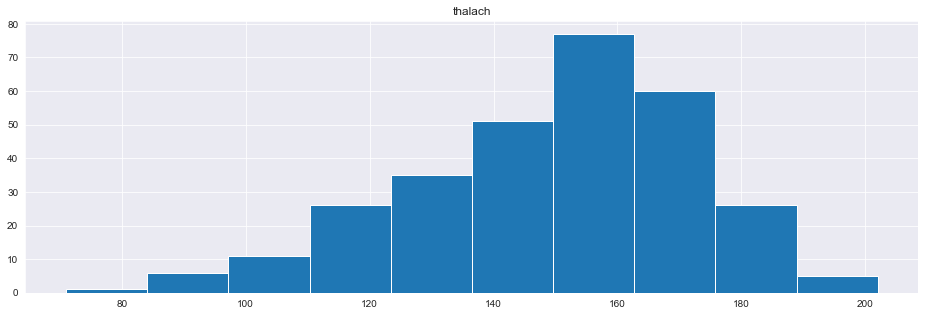

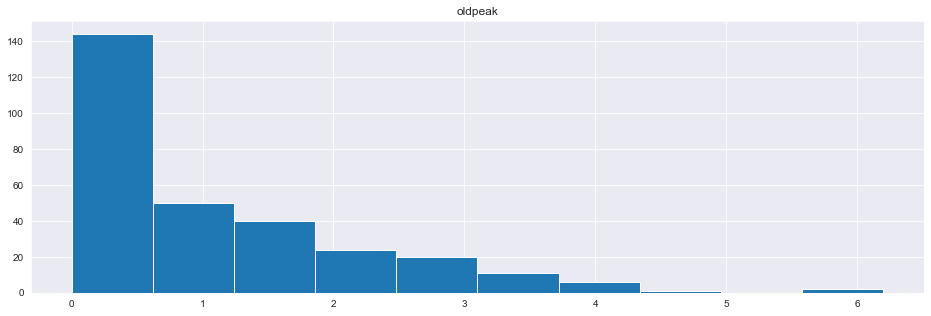

<Figure size 1152x360 with 0 Axes>

In [18]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.figure(figsize = (16, 5))
    plt.show

###### <font color = 'yellow'> From the visualization of our numerical columns, we can infer that each column has a normal distribution. </font>

<AxesSubplot:>

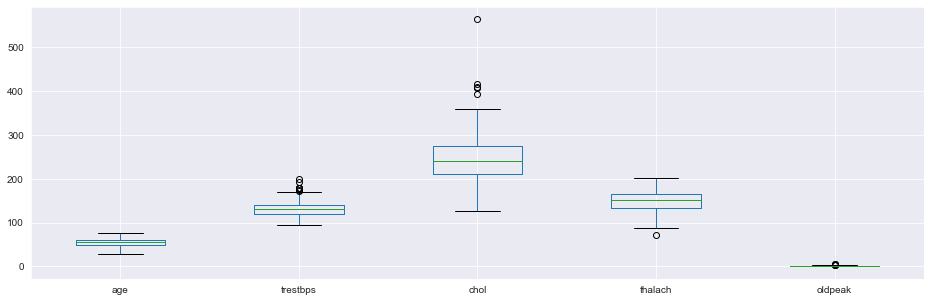

In [19]:
df_num.boxplot(column=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], figsize = (16, 5))

In [20]:
df_cat
for col in df_cat:
    print(df_cat[col].value_counts())

1    202
0     96
Name: sex, dtype: int64
0    142
2     84
1     49
3     23
Name: cp, dtype: int64
0    254
1     44
Name: fbs, dtype: int64
1    148
0    146
2      4
Name: restecg, dtype: int64
0    200
1     98
Name: exang, dtype: int64
2    139
1    138
0     21
Name: slope, dtype: int64
0    175
1     65
2     38
3     20
Name: ca, dtype: int64
2    163
3    115
1     18
0      2
Name: thal, dtype: int64
1    161
0    137
Name: target, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


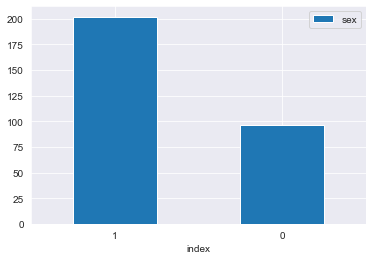

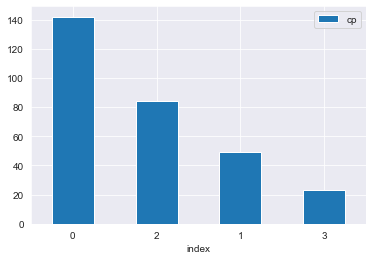

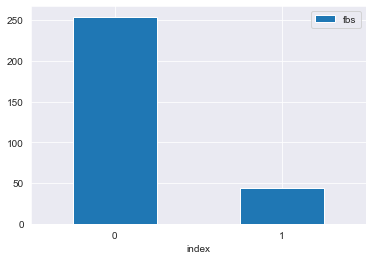

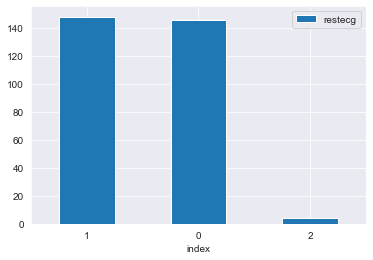

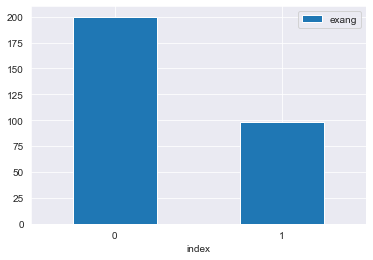

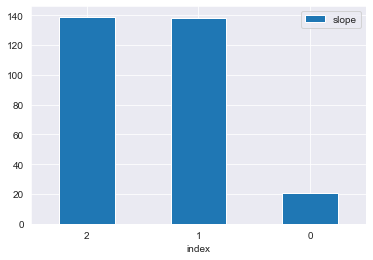

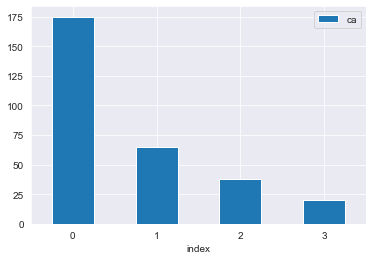

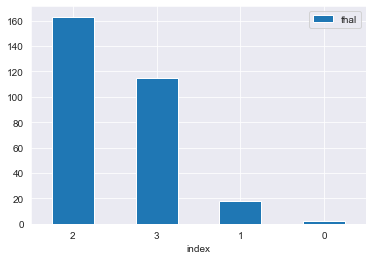

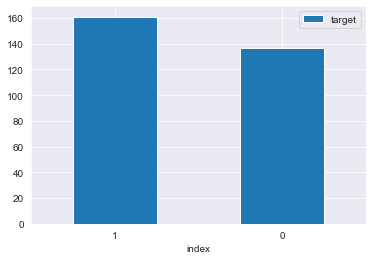

In [21]:
## bar graphs for category columns
for col in df_cat:
    a = df_cat[col].value_counts()
    b = a.reset_index()
    print(b.plot.bar(x = 'index', y = col,  rot = 0))

###### <font color = 'yellow'> Analysis and visualization of our categorical columns reveal: <br>
###### <font color = 'yellow'> - Sex: There are 207 males and 96 females in our dataset. <br> - Target: 161 individuals developed a heart attack and 137 did not. <br> - fbs: There are significantly more individuals with a fasting blood sugar type 0 (254) than 1 (44) within our dataset.

#### 2c. Study the occurrence of MCI across the Age category
##### 1 = MCI
##### 0 = No MCI

In [22]:
df.MCI_cat.value_counts()

MCI       161
No MCI    137
Name: MCI_cat, dtype: int64

In [23]:
df.groupby('target')['age'].mean()

target
0    56.700730
1    52.645963
Name: age, dtype: float64

###### <font color = 'yellow'> Here we can infer the average age of individuals who didn't develop MCI is 56 years old, and the average age of those who did develop CVD is 52 years old. </font>

In [24]:
df.groupby('target')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,137.0,56.700730,7.905103,35.0,52.0,58.0,62.0,77.0
1,161.0,52.645963,9.521298,29.0,45.0,52.0,59.0,76.0


###### <font color = 'yellow'> Since both std's are greater than the difference of the means, we can infer that the data does not support the hypothesis that the older you are the more likely you are to develop MCI.

<AxesSubplot:title={'center':'age'}, xlabel='target'>

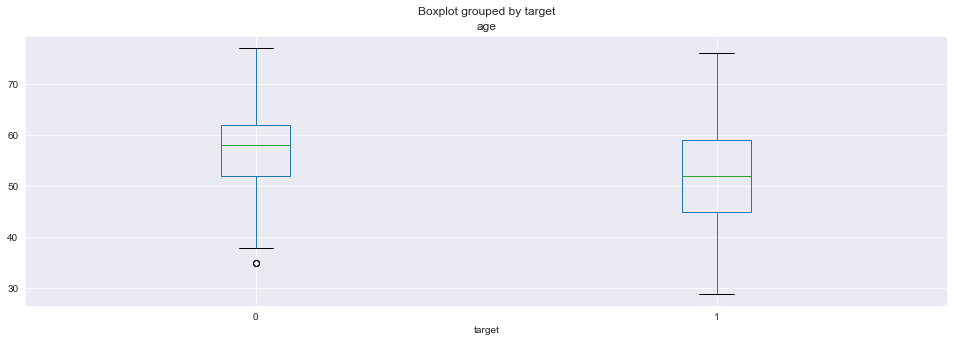

In [25]:
df.boxplot(column = 'age', by = 'target', figsize = (16, 5))

In [26]:
df.groupby('target')['age'].value_counts()

target  age
0       58     12
        57     10
        59      9
        60      8
        61      7
               ..
1       40      1
        61      1
        70      1
        74      1
        76      1
Name: age, Length: 74, dtype: int64

###### <font color='orange'> Using this groupby funcion, it is a bit complex to read and understand what proportions of individuals developed or didn't develop CVD based on their age, given the vast number of values within the age column. So it might be helpful to break up the age column and convert it to a categorical column. </font>

In [27]:
df.age.describe()

count    298.000000
mean      54.510067
std        9.030526
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

###### <font color = 'yellow'> From the describe function, we infer that the average age within our dataset is 54 and that 50% of individuals within our dataset are aged 56 and above. Therefore, this will help us break up the age column into columns using 55 as the median age.

In [28]:
df['age_cat'] = df.apply(lambda x: '<= 55 years old' if x['age'] <= 55 else '> 55 years old', axis = 1)
df['age_cat'].value_counts()

> 55 years old     150
<= 55 years old    148
Name: age_cat, dtype: int64

In [29]:
df['age_cat_2'] = df.apply(lambda x: 'Less than 50' if x['age'] < 50 else \
                           'Greater than 50 years old' if((x['age'] >= 50) & (x['age'] <= 60)) else 'Greater than 60 yrs old' , axis = 1)
df['age_cat_2'].value_counts()

Greater than 50 years old    134
Less than 50                  85
Greater than 60 yrs old       79
Name: age_cat_2, dtype: int64

In [30]:
df['age_cat_3'] = df.apply(lambda x: '0-50' if x['age'] < 50 else \
                           '50 - 55' if ((x['age'] >= 50) & (x['age'] <= 55)) else \
                           '55 - 60' if ((x['age'] >= 55) & (x['age'] <= 60)) else '60 and above', axis = 1)
df['age_cat_3'].value_counts()

0-50            85
60 and above    79
55 - 60         71
50 - 55         63
Name: age_cat_3, dtype: int64

In [31]:
df.groupby('MCI_cat')['age_cat_3'].value_counts()

MCI_cat  age_cat_3   
MCI      0-50            60
         50 - 55         40
         60 and above    35
         55 - 60         26
No MCI   55 - 60         45
         60 and above    44
         0-50            25
         50 - 55         23
Name: age_cat_3, dtype: int64

##### <font color='orange'> When the age column is broken into categories, we infer that: <br>
###### <font color = 'yellow'> For individuals aged **LESS than 50**: <br> - 25 DID NOT develop MCI <br> - 60 DEVELOPED MCI.
###### <font color = 'yellow'> For individuals aged **50 - 55**: <br> - 23 DID NOT develop MCI <br> - 40 DEVELOPED MCI.
###### <font color = 'yellow'> For individuals aged **55 - 60**: <br> - 45 DID NOT develop MCI <br> - 26 DEVELOPED MCI.
###### <font color = 'yellow'> For individuals aged **GREATER than 60**: <br> - 44 DID NOT develop MCI <br> - 35 DEVELOPED MCI.

## 2d.	Study the composition of all patients with respect to the Sex category
##### 1 = male <br> 0 = female

In [32]:
print(df.sex.value_counts(normalize = True))
df.sex.value_counts()
# There are 202 males and 96 females. 68% of our data are males, 32% are females

1    0.677852
0    0.322148
Name: sex, dtype: float64


1    202
0     96
Name: sex, dtype: int64

In [33]:
print(pd.crosstab(df.sex, df.target))
pd.crosstab(df.sex, df.MCI_cat, normalize='index')

target    0   1
sex            
0        24  72
1       113  89


MCI_cat,MCI,No MCI
sex,,
0,0.750000,0.250000
1,0.440594,0.559406


###### <font color = 'yellow'> Out of 202 males: <br> - 113 did not develop MCI (55%) while 89 did develop MCI (44%). <br>
###### <font color = 'yellow'> Out of 96 females: <br> - 24 did not develop MCI (25%) while 72 did develop MCI (75%). <br>

In [34]:
df_num.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')

In [35]:
df.groupby('sex')['age', 'trestbps', 'chol', 'thalach', 'oldpeak'].mean()

,age,trestbps,chol,thalach,oldpeak
sex,,,,,
0,55.677083,133.083333,261.302083,151.125000,0.876042
1,53.955446,130.866337,240.064356,148.678218,1.140594


<AxesSubplot:xlabel='sex'>

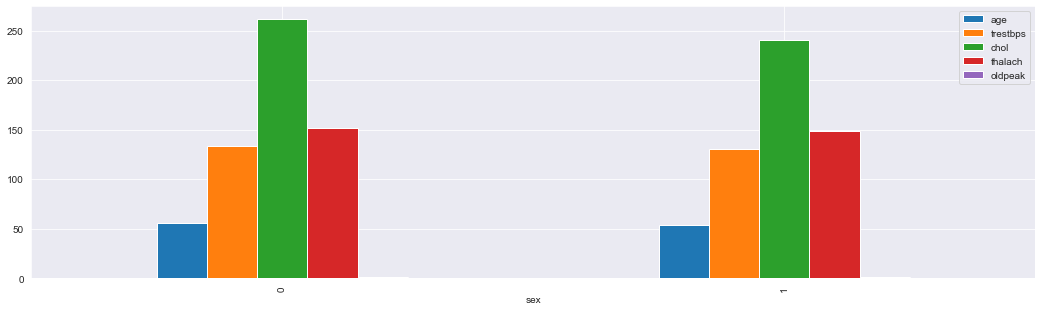

In [36]:
df_ct = df.groupby('sex')['age', 'trestbps', 'chol', 'thalach', 'oldpeak'].mean().reset_index()
df_ct.plot(x = 'sex',
           y=['age', 'trestbps',  'chol', 'thalach', 'oldpeak'],
           kind = 'bar',
           fontsize=10, figsize=(18, 5))

###### <font color = 'yellow'> - The average age of women (55) within our dataset is higher than that of men (53). <br> - Women's average trestbps (resting blood pressure on admission to the hospital) is higher (133.08) when compared to men (130.86) <br> - Women's average chol (serum cholesterol) is also higher (261.30) when compared to men (240.06) <br> - Women's average thalach (maximum heart rate achieved) is also higher (151.12) when compared to men (148.67) <br> - Oldpeak (ST depression) is the only numeric category where men's average (1.14) is greater when compared to women's average (0.87)

In [37]:
pd.crosstab(df.sex, df.age_cat_3)

age_cat_3,0-50,50 - 55,55 - 60,60 and above
sex,,,,
0,24,20,18,34
1,61,43,53,45


###### <font color = 'yellow'> Age distribution by sex: <br> - 0 - 50: 24 Women & 61 Men <br> - 50 - 55: 20 W & 43 M <br> - 55 - 60: 18 W & 53 M <br> - 60 and above: 34 W & 45

In [38]:
df_cat.columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal',
       'target'],
      dtype='object')

In [39]:
pd.crosstab(df.sex, df.cp)

cp,0,1,2,3
sex,,,,
0,39,18,35,4
1,103,31,49,19


In [40]:
pd.crosstab(df.sex, df.restecg)

restecg,0,1,2
sex,,,
0,44,49,3
1,102,99,1


In [41]:
pd.crosstab(df.sex, df.fbs)

fbs,0,1
sex,,
0,84,12
1,170,32


In [42]:
pd.crosstab(df.sex, df.thal)

thal,0,1,2,3
sex,,,,
0,1,1,79,15
1,1,17,84,100


In [43]:
pd.crosstab(df.sex, df.exang)

exang,0,1
sex,,
0,74,22
1,126,76


In [44]:
pd.crosstab(df.sex, df.slope)

slope,0,1,2
sex,,,
0,5,45,46
1,16,93,93


In [45]:
pd.crosstab(df.sex, df.ca)

ca,0,1,2,3
sex,,,,
0,64,15,13,4
1,111,50,25,16


## 2e. Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

In [46]:
df.trestbps.describe()

count    298.000000
mean     131.580537
std       17.669293
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

###### <font color = 'yellow'> Here we see that: <br> - the average resting blood pressure is 131.58 <br> - the maximum resting blood pressure is 200 <br> - The lowest resting blood pressure is 94 <br> - 75% of individuals in our dataset have a resting blood pressure of 120 and above.

In [47]:
df.groupby('target')['trestbps'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,137.0,134.416058,18.797545,100.0,120.0,130.0,145.0,200.0
1,161.0,129.167702,16.323004,94.0,120.0,130.0,140.0,180.0


<AxesSubplot:xlabel='target'>

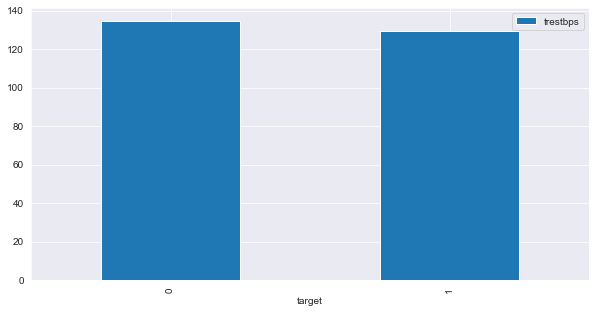

In [48]:
bp = df.groupby('target')['trestbps'].mean().reset_index()
bp.plot(x = 'target', y = ['trestbps'], kind = 'bar', fontsize = 10, figsize = (10, 5))

In [49]:
df['bloodpressure'] = df.apply(lambda x: '< 131' if x['trestbps'] < 131 else '> 131', axis =1)
df['bloodpressure'].value_counts()

< 131    170
> 131    128
Name: bloodpressure, dtype: int64

In [50]:
pd.crosstab(df['bloodpressure'], df['target'], rownames=['bloodpressure'], colnames=['target'])

target,0,1
bloodpressure,,
< 131,71,99
> 131,66,62


<AxesSubplot:xlabel='target', ylabel='trestbps'>

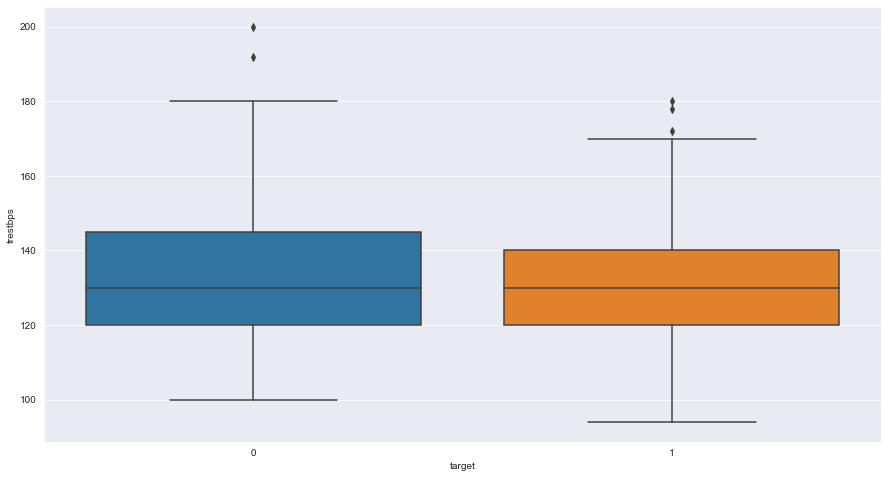

In [51]:
import seaborn as sns
plt.figure(figsize=(15,8))
plt.xticks(rotation = 0)
sns.boxplot('target', 'trestbps', data=df)

In [52]:
import statsmodels.formula.api as smf
m1 = smf.logit(
    formula='target ~ trestbps',
    data=df) \
.fit()
print(m1.summary())

Optimization terminated successfully.
         Current function value: 0.678812
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  298
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Nov 2022   Pseudo R-squ.:                 0.01607
Time:                        13:39:43   Log-Likelihood:                -202.29
converged:                       True   LL-Null:                       -205.59
Covariance Type:            nonrobust   LLR p-value:                   0.01015
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4277      0.906      2.681      0.007       0.653       4.203
trestbps      -0.0172      0.

###### <font color = 'yellow'> Enter observation here: <br> - The average resting blood pressure of individuals who developed MCI is 129 with a std of 16 <br> - The average resting blood pressure of individuals who did not develop MCI is 134 with a std of 16
###### <font color = 'yellow'> Therefore, we cannot detect heart attacks based on anomalies in the resting blood pressure (trestbps) as the p-value is <font color = 'green'> **greater** <font color = 'yellow'> than 0.05

## 2f. Describe the relationship between cholesterol levels and a target variable

In [53]:
df.chol.describe()

count    298.000000
mean     246.906040
std       51.893097
min      126.000000
25%      211.000000
50%      241.500000
75%      275.000000
max      564.000000
Name: chol, dtype: float64

In [54]:
df.groupby('MCI_cat')['chol'].describe()
# For those who developed a heart attack, the minimum cholesterol level is 126 and the maximum 564. The average cholesterol for those who developed MCI is 235
# For those whp didn't develop a heart attack, the minimum cholesterol level is 131 and the maximum 409. The average cholesterol for those who did not develop MCI is 243
# The average cholesterol for those who developed MCI is lower than those who developed MCI

,count,mean,std,min,25%,50%,75%,max
MCI_cat,,,,,,,,
MCI,161.0,243.322981,53.633082,126.0,209.0,235.0,268.0,564.0
No MCI,137.0,251.116788,49.634853,131.0,217.0,249.0,283.0,409.0


<AxesSubplot:xlabel='target'>

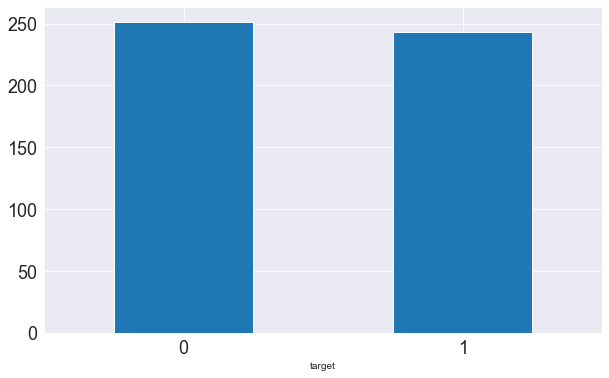

In [55]:
df.groupby('target')['chol'].mean().plot(kind='bar', rot=0, fontsize=18, figsize=(10, 6))

<AxesSubplot:xlabel='target', ylabel='chol'>

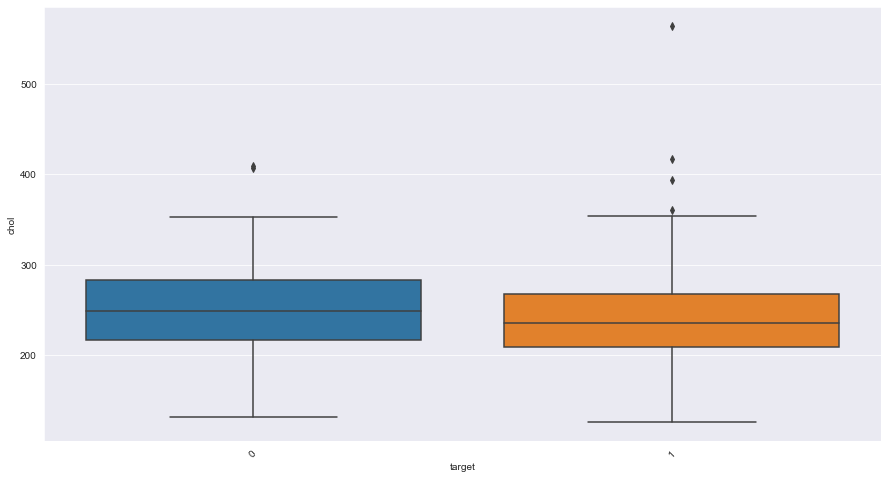

In [56]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('target', 'chol', data=df)

In [57]:
import statsmodels.formula.api as smf
m1 = smf.logit(
    formula='target ~ chol',
    data=df) \
.fit()
print(m1.summary())

Optimization terminated successfully.
         Current function value: 0.687083
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  298
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Nov 2022   Pseudo R-squ.:                0.004084
Time:                        13:39:45   Log-Likelihood:                -204.75
converged:                       True   LL-Null:                       -205.59
Covariance Type:            nonrobust   LLR p-value:                    0.1950
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8840      0.574      1.540      0.124      -0.241       2.010
chol          -0.0029      0.

###### <font color = 'yellow'> For those who developed a heart attack: <br>  - The minimum cholesterol level is 126 and the maximum 564. <br> - The average cholesterol for those who developed MCI is 235
###### <font color = 'yellow'> For those who didn't develop a heart attack: <br> - The minimum cholesterol level is 131 and the maximum 409. <br> - The average cholesterol for those who did not develop MCI is 243
###### <font color = 'yellow'> The average cholesterol is lower for individuals who DEVELOPED MCI when compared to individuals who DID NOT DEVELOP MCI.
###### <font color = 'yellow'> A simple regression is performed between the target variable and cholesterol. <br> - As the P-value for cholesterol in relation to developing MCI is less than 0.05, we can infer that cholesterol is not a clear predictor of MCI.

## 2g. State what relationship exists between peak exercising and the occurrence of a heart attack

In [58]:
df.slope.value_counts()
# We see that there are three categories for the peak exercising column

2    139
1    138
0     21
Name: slope, dtype: int64

In [59]:
pd.crosstab(df.MCI_cat, df.slope)

slope,0,1,2
MCI_cat,,,
MCI,9,48,104
No MCI,12,90,35


###### <font color = 'yellow' > Here we notice that significantly more individuals with ordinal value 2 of peak exercising developed MCI.

<AxesSubplot:xlabel='MCI_cat,slope'>

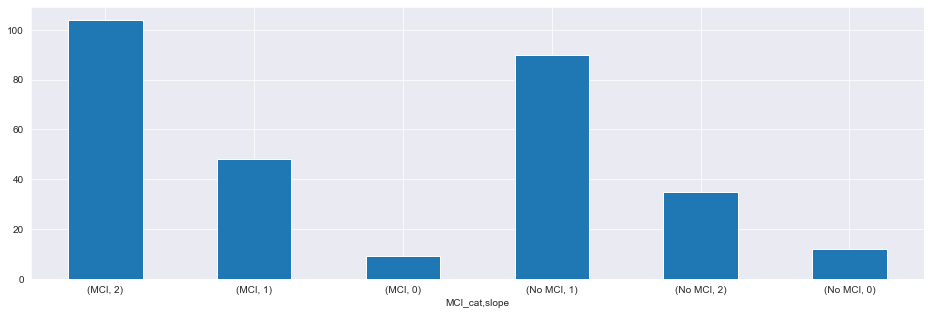

In [60]:
df.groupby('MCI_cat')['slope'].value_counts().plot(kind = 'bar', x = 'target', y = ['slope'], rot = 0, fontsize = 10, figsize = (16,5))

<AxesSubplot:xlabel='slope', ylabel='target'>

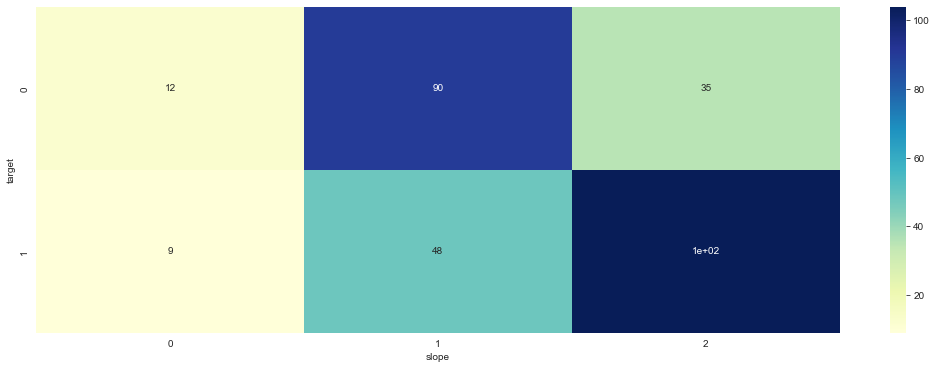

In [61]:
contingency = pd.crosstab(df['target'], df['slope'],
                          rownames=['target'], colnames=['slope'])
plt.figure(figsize=(18,6))
sns.heatmap(contingency, annot=True, cmap="YlGnBu" )

In [62]:
import statsmodels.formula.api as smf
m1 = smf.logit(
    formula='target ~ slope',
    data=df) \
.fit()
print(m1.summary())
## LLR p-value tells us that the slope is a significant predictor of target. slope is x and target is y
# peak exercise is a significant predictor of MCI as the p-value is significantly less than 0.005

Optimization terminated successfully.
         Current function value: 0.629360
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  298
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Nov 2022   Pseudo R-squ.:                 0.08775
Time:                        13:39:49   Log-Likelihood:                -187.55
converged:                       True   LL-Null:                       -205.59
Covariance Type:            nonrobust   LLR p-value:                 1.892e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5158      0.323     -4.698      0.000      -2.148      -0.883
slope          1.2072      0.

###### <font color = 'yellow'> Peak exercise is a significant predictor of MCI as the p-value is significantly less than 0.05

## 2h. Check if thalassemia is a major cause of MCI

In [63]:
df.thal.value_counts()

2    163
3    115
1     18
0      2
Name: thal, dtype: int64

In [64]:
pd.crosstab(df.MCI_cat, df.thal)

thal,0,1,2,3
MCI_cat,,,,
MCI,1,6,127,27
No MCI,1,12,36,88


In [65]:
import statsmodels.formula.api as smf
m1 = smf.logit(
    formula='target ~ thal',
    data=df) \
.fit()
print(m1.summary())

Optimization terminated successfully.
         Current function value: 0.626721
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  298
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Nov 2022   Pseudo R-squ.:                 0.09158
Time:                        13:39:49   Log-Likelihood:                -186.76
converged:                       True   LL-Null:                       -205.59
Covariance Type:            nonrobust   LLR p-value:                 8.443e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1597      0.547      5.775      0.000       2.087       4.232
thal          -1.2828      0.

###### <font color = 'yellow'> Thalassemia is a major predictor of MCI.

###### fbs = Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

In [66]:
df['fbs'].value_counts()

0    254
1     44
Name: fbs, dtype: int64

###### <font color ='yellow'> Significantly more individuals in our dataset have a fasting blood sugar that is less than 120 mg/dl.

In [67]:
pd.crosstab(df.MCI_cat, df.fbs) #normalize='index')

fbs,0,1
MCI_cat,,
MCI,138,23
No MCI,116,21


###### <font color = 'yellow'> Out of 254 individuals with fbs less than 120 mg/dl: <br> - 116 did not develop MCI (45%) <br> - 138 developed MCI (56%).
###### <font color = 'yellow'> Out of 44 individuals with fbs greater than 120 mg/dl: <br> - 21 did not develop MCI <br> - 23 developed MCI
###### <font color = 'yellow'> Of the total 161 individuals who developed MCI: <br> - 138 had a fbs less than 120 mg/dl (85%) <br> - 23 had a fbs more than 120 mg/dl (14%)
###### <font color = 'yellow'> With this, we can hypothesize that having a fbs < 120 mg/dl will lead to MCI.

In [68]:
import statsmodels.formula.api as smf
m1 = smf.logit(formula = 'target ~ fbs', data = df) .fit()
print(m1.summary())

Optimization terminated successfully.
         Current function value: 0.689793
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  298
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Nov 2022   Pseudo R-squ.:               0.0001553
Time:                        13:39:49   Log-Likelihood:                -205.56
converged:                       True   LL-Null:                       -205.59
Covariance Type:            nonrobust   LLR p-value:                    0.8005
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1737      0.126      1.379      0.168      -0.073       0.421
fbs           -0.0827      0.

###### <font color = 'yellow'> From our simple regression between target variable and fbs, we infer: <br> - Since the p-value is greater than 0.05 we can reject our hypothesis. <br> - fbs is not a significant predictor of MCI.

In [69]:
df.restecg.value_counts()

1    148
0    146
2      4
Name: restecg, dtype: int64

In [70]:
pd.crosstab(df.MCI_cat, df.restecg)

restecg,0,1,2
MCI_cat,,,
MCI,68,92,1
No MCI,78,56,3


In [71]:
import statsmodels.formula.api as smf
m1 = smf.logit(formula = 'target ~ restecg', data = df) .fit()
print(m1.summary())

Optimization terminated successfully.
         Current function value: 0.682109
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  298
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Nov 2022   Pseudo R-squ.:                 0.01129
Time:                        13:39:50   Log-Likelihood:                -203.27
converged:                       True   LL-Null:                       -205.59
Covariance Type:            nonrobust   LLR p-value:                   0.03117
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0871      0.164     -0.531      0.595      -0.409       0.234
restecg        0.4801      0.

###### <font color = 'yellow'> Resting electrocardiographic results (restecg) is not a predictor of MCI.

In [72]:
df.exang.value_counts()

0    200
1     98
Name: exang, dtype: int64

In [73]:
pd.crosstab(df.MCI_cat, df.exang)

exang,0,1
MCI_cat,,
MCI,138,23
No MCI,62,75


In [74]:
import statsmodels.formula.api as smf
m1 = smf.logit(formula = 'target ~ exang', data = df) .fit()
print(m1.summary())

Optimization terminated successfully.
         Current function value: 0.594695
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  298
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Nov 2022   Pseudo R-squ.:                  0.1380
Time:                        13:39:50   Log-Likelihood:                -177.22
converged:                       True   LL-Null:                       -205.59
Covariance Type:            nonrobust   LLR p-value:                 4.967e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8001      0.153      5.233      0.000       0.500       1.100
exang         -1.9821      0.

###### <font color = 'yellow'> Exercise-induced angina (exang) is a predictor of MCI.

In [75]:
import statsmodels.formula.api as smf
m1 = smf.logit(formula = 'target ~ thalach', data = df) .fit()
print(m1.summary())

Optimization terminated successfully.
         Current function value: 0.595394
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  298
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Nov 2022   Pseudo R-squ.:                  0.1370
Time:                        13:39:50   Log-Likelihood:                -177.43
converged:                       True   LL-Null:                       -205.59
Covariance Type:            nonrobust   LLR p-value:                 6.140e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.3017      0.987     -6.387      0.000      -8.236      -4.368
thalach        0.0433      0.

###### <font color = 'yellow'> Thalach is a predictor of MCI

In [76]:
import statsmodels.formula.api as smf
m1 = smf.logit(formula = 'target~age', data = df).fit()
m2 = smf.logit(formula = 'target~sex', data = df).fit()
m3 = smf.logit(formula = 'target~cp', data = df).fit()
m4 = smf.logit(formula = 'target~ca', data = df).fit()
m5 = smf.logit(formula = 'target~oldpeak', data = df).fit()
print(m1.summary() , '\n' ,  m2.summary(), '\n', m3.summary(), '\n', m4.summary(), '\n', m5.summary() )


Optimization terminated successfully.
         Current function value: 0.664169
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.646211
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591639
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570609
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.587008
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  298
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Nov 2022   Pseudo R-squ.:                 0.03730
Time:                        13:39:52   Log-Likelihood:                -197.92
converged:      

###### <font color = 'yellow'> - Age: p-value < 0.05, therefore a predictor of MCI <br> - Sex: p-value < 0.05, therefore a predictor of MCI <br> - Cp: p-value < 0.05, therefore a predictor of MCI <br> - Ca: p-value < 0.05, therefore a predictor of MCI <br> - Oldpeak: p-value < 0.05, therefore a predictor of MCI

## 2j. Use a pair plot to understand the relationship between all the given variables

In [77]:
corr = df_num.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.288915,0.201646,-0.393775,0.199619
trestbps,0.288915,1.000000,0.127441,-0.050771,0.197147
chol,0.201646,0.127441,1.000000,0.000299,0.043977
thalach,-0.393775,-0.050771,0.000299,1.000000,-0.340350
oldpeak,0.199619,0.197147,0.043977,-0.340350,1.000000


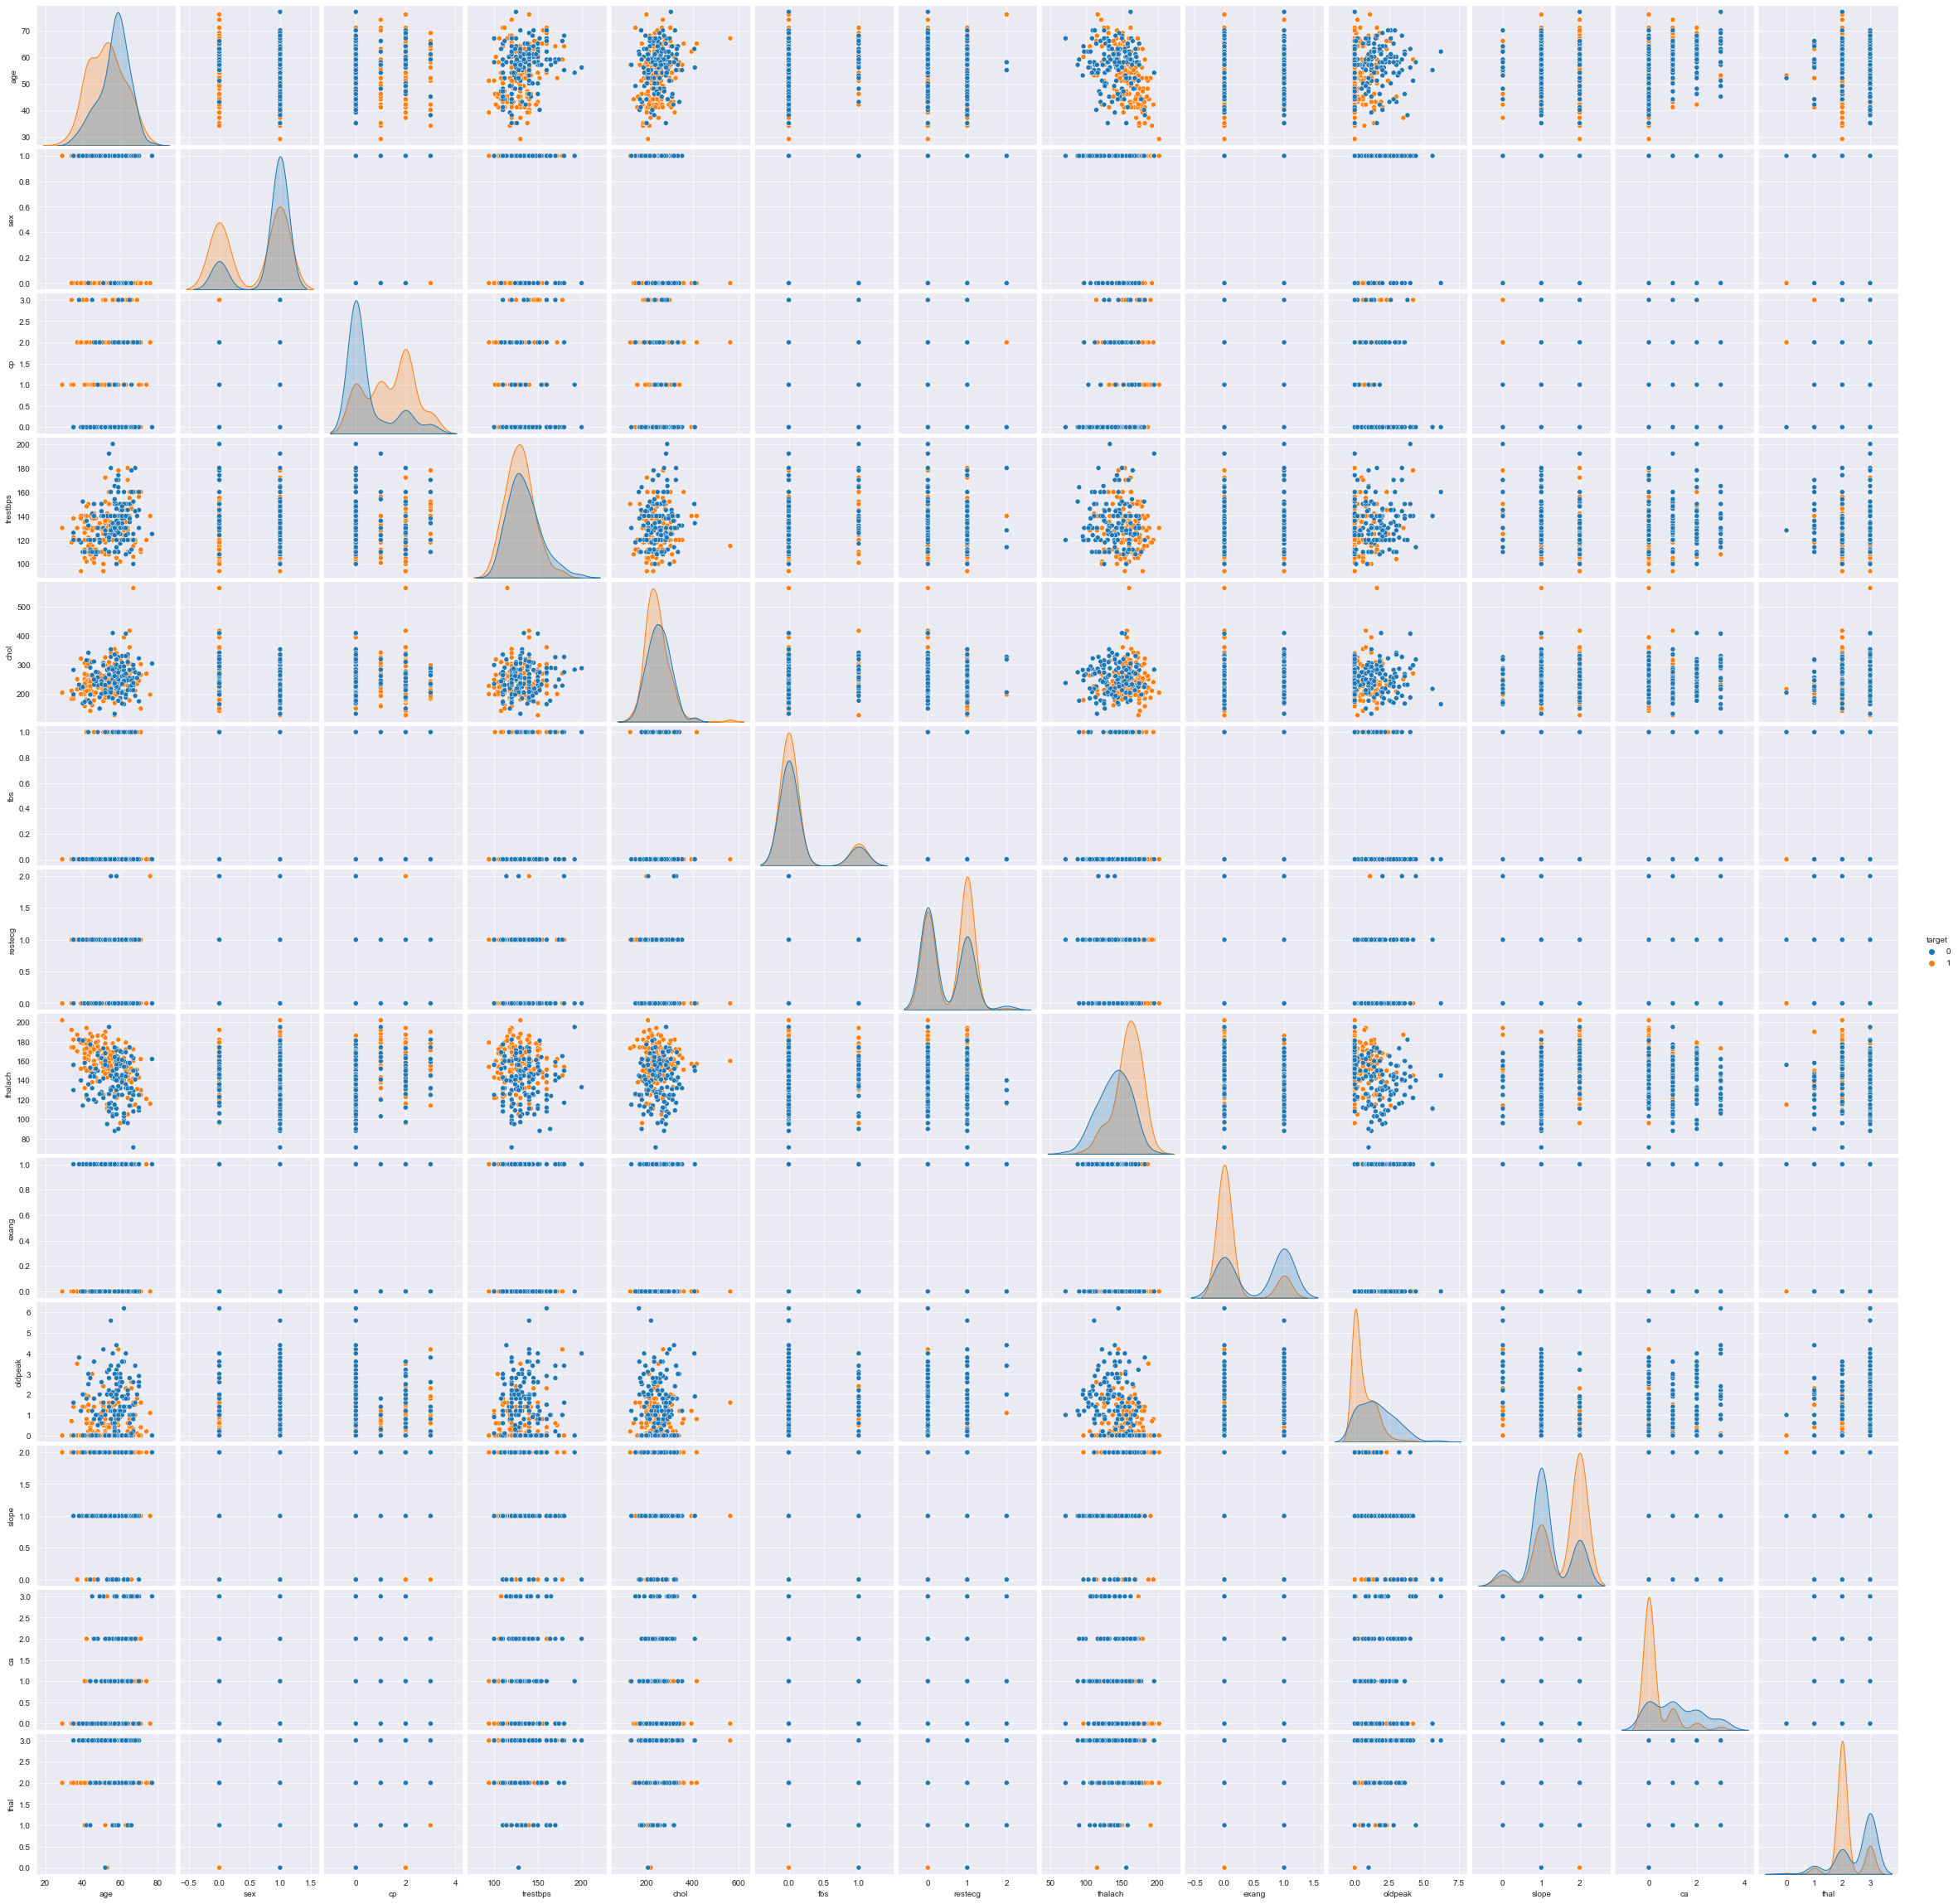

In [78]:
sns.pairplot(df, hue = 'target')

## 3. Using Logistic Regression and Random Forest to build a baseline model that predicts the risk of a heart attack

In [79]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'restecg_cat',
       'MCI_cat', 'age_cat', 'age_cat_2', 'age_cat_3', 'bloodpressure'],
      dtype='object')

In [91]:
Xtrain = df[['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
ytrain = df[['target']]

# building the model and fitting the data
log_reg = sm.Logit(ytrain, Xtrain).fit()
print('Model 1', log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.337194
         Iterations 7
Model 1                            Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  298
Model:                          Logit   Df Residuals:                      286
Method:                           MLE   Df Model:                           11
Date:                Tue, 15 Nov 2022   Pseudo R-squ.:                  0.5112
Time:                        14:31:37   Log-Likelihood:                -100.48
converged:                       True   LL-Null:                       -205.59
Covariance Type:            nonrobust   LLR p-value:                 5.624e-39
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -1.7610      0.462     -3.810      0.000      -2.667      -0.855
cp             0.8120

###### <font color = 'yellow'> The first Logistic Regression Model ran was iterated 7 times and as the p-value is less than 0.05 (5.624e-39), our model is very significant. <br> From our model, we infer: <br> Of the 13 variables within our dataset, only 7 are significant predictors of MCI. <br> -  <font color = 'orange'> sex, cp, thalach, exang, slope, ca, and thal <font color = 'yellow'> are all significant predictor variables.

In [81]:
Xtrain = df[['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']]
ytrain = df[['target']]

# building the model and fitting the data
log_reg2 = sm.Logit(ytrain, Xtrain).fit()
print("Model 2", log_reg2.summary())

Optimization terminated successfully.
         Current function value: 0.353893
         Iterations 7
Model 2                            Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  298
Model:                          Logit   Df Residuals:                      291
Method:                           MLE   Df Model:                            6
Date:                Tue, 15 Nov 2022   Pseudo R-squ.:                  0.4870
Time:                        13:42:40   Log-Likelihood:                -105.46
converged:                       True   LL-Null:                       -205.59
Covariance Type:            nonrobust   LLR p-value:                 1.670e-40
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -1.4880      0.416     -3.580      0.000      -2.303      -0.673
cp             0.7517

###### <font color = 'yellow'> The second Logistic Regression Model strictly includes all significant predictor values identified within the first model. <br> The overall p-value for our significant predictor variables is: <font color = 'orange'> 1.670e-40.

## Predicting new data

In [109]:
from sklearn.model_selection import train_test_split
X=df[['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y=df[['target']]
#y=y.astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [110]:
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.316632
         Iterations 8


In [111]:
yhat = log_reg.predict(X_test)
prediction = list(map(round, yhat))

# comparing original and predicted values of y
print('Actual values', list(y_test.values))
print("\n")
print('Predictions :', prediction)

Actual values [array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0],

In [112]:
from sklearn.metrics import (confusion_matrix, accuracy_score)

# confusion matrix
cm = confusion_matrix(y_test, prediction)
print ("Confusion Matrix : \n", cm)

# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))

Confusion Matrix : 
 [[37  8]
 [ 7 38]]
Test accuracy =  0.8333333333333334


###### <font color = 'yellow'> Using the accuracy score function we infer that our prediction model is 83.3% accurate. <br> From the confusion matrix, we observe: <br> - 37 True Positives <br> - 7 False Positives <br> - 8 False Negatives <br> - 38 True Negatives

In [113]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds =roc_curve(y_test, yhat)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.900741


### Visualization of ROC curve

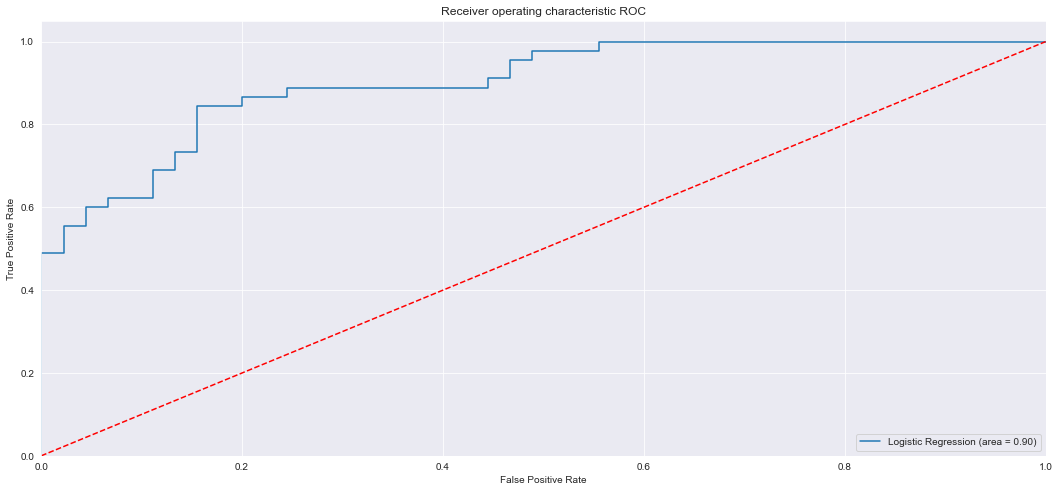

In [114]:
logit_roc_auc = roc_auc_score(y_test, yhat)
fpr, tpr, thresholds = roc_curve(y_test, yhat)
plt.figure(figsize=(18,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC')
plt.legend(loc="lower right")
plt.show()

###### <font color = 'yellow'> The area under the curve score for the Logistic Regression Model  is: 90%

### Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [116]:
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80        45
           1       0.79      0.82      0.80        45

    accuracy                           0.80        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.80      0.80      0.80        90



###### <font color = 'yellow'> The Random Forest Model is 80% accurate, which is lower than that of the Logistic Regression Model.

In [117]:
print(confusion_matrix(y_test,predictions))

[[35 10]
 [ 8 37]]


###### <font color = 'yellow'> The Random Forest Model produced: <br> - 35 True Positives <br> - 8 False Positives <br> - 10 False Negatives <br> - 37 True Negatives.

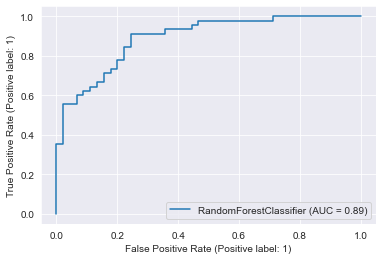

In [118]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test)
plt.show()

###### <font color = 'yellow'> The area under the curve score for the Random Forest Model is: 89%